# EV Charging Analysis
# 3.0 Stream 3 - Availability
Includes loading data, exploration, Availability visuals, Availability prediction, and summary.

#### Loading Data

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

# Load clean_ev_data
df = pd.read_csv('clean_ev_data.csv')
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Session Duration (hours),Price per kWh,Efficiency (km per kWh)
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000,0.215569,4.835954
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667,1.712292,9.085850
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2.800000,1.864577,3.753449
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3.700000,0.164065,2.511745
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,1.766667,0.517674,10.375504


#### A copy is made for purposes of EV charging availability Analysis

In [12]:
df_avl =df.copy()
df_avl.head(2)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Session Duration (hours),Price per kWh,Efficiency (km per kWh)
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000,0.215569,4.835954
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667,1.712292,9.085850


## Stream 3 - Availability Analysis
**Description**  
This section reloads the cleaned data and proceeds to carry out an exploratory analysis of charging availability analysis.

**Explanation**  
This will be achieved via:
1. Overall Usage patterns.
2. Charger type dynamics.
3. Temporal or "Peak" Patterns

### 3.1 Overall Usage patterns.
### 3.1.1 Average Session duration by City
**Description**  
This bar chart shows the average session duration per hour across all cities in the dataset.

**Explanation**  
Comparing average charging durations by city reveals locations' charge type optimisation and mix. It also helps predict Urban density and driving patterns, thereby predicting demand peaks. 

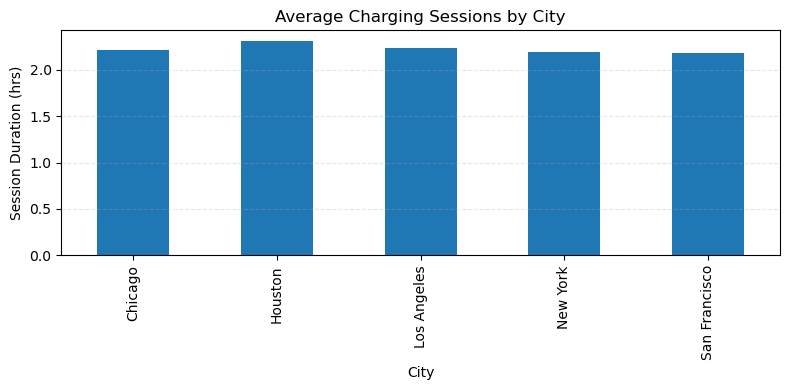

In [79]:
df.groupby('Charging Station Location')['Session Duration (hours)'].mean().plot(kind='bar', figsize=(8,4))
plt.title('Average Charging Sessions by City')
plt.xlabel('City')
plt.ylabel('Session Duration (hrs)')
plt.grid(True, axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

The bar chart shows the average charging session duration per hour across major U.S. cities, which is over 2 hours for all. Houston has the longest charging duration average, indicating Levels 1 and 2 AC charging dominate across all regions. It might also suggest a more relaxed urban driving pattern e.g public Charging as "Destination Charging. Los Angeles,  New York, and San Francisco follow, respectively and show similar and relatively high duration levels. Overall, the visualization highlights minimal regional differences in EV charging duration sessions, which can influence implications for Infrastructure and revenue model for Operators.

### 3.1.2 Distribution of Charging Duration by Time of day
**Description**  
This box plot shows the distribution of charging duration by time of day.

**Explanation**  
Comparing the distribution of charging duration by time of day is crucial in understanding usage dynamics during times of day. When is charging longer, night or day?

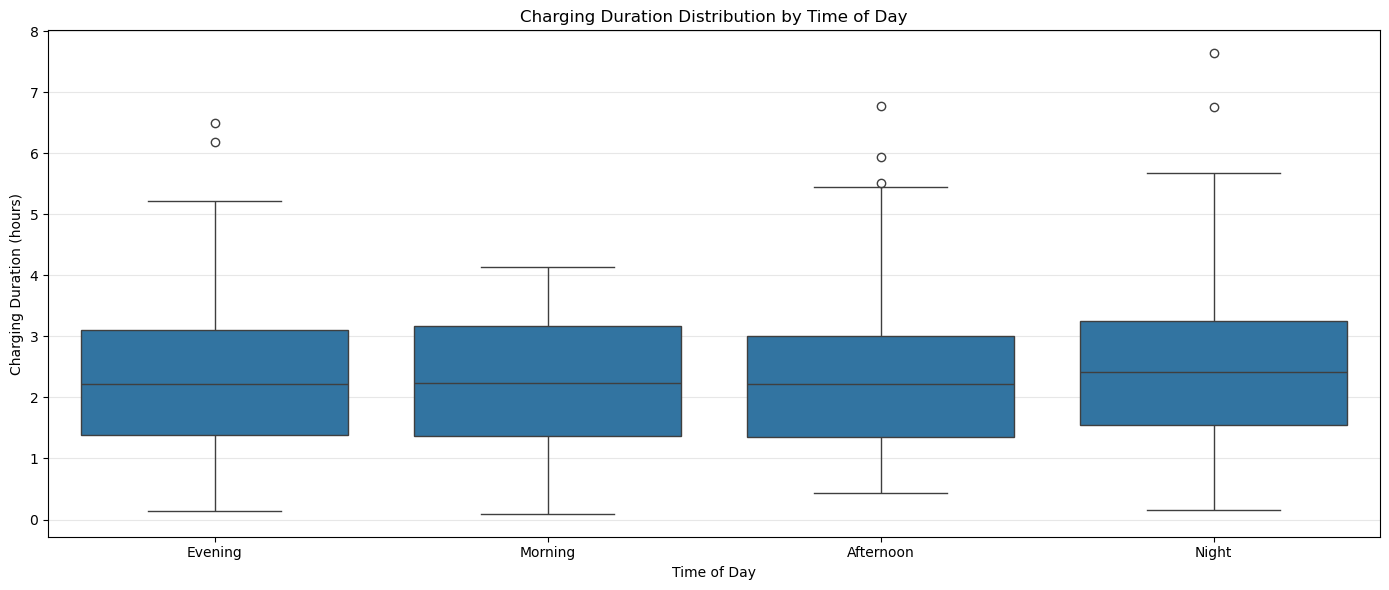

In [13]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Time of Day', y='Charging Duration (hours)', data=df)
plt.title('Charging Duration Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Charging Duration (hours)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

### 3.1.3 Occupancy Heatmap (Time × City matrix)

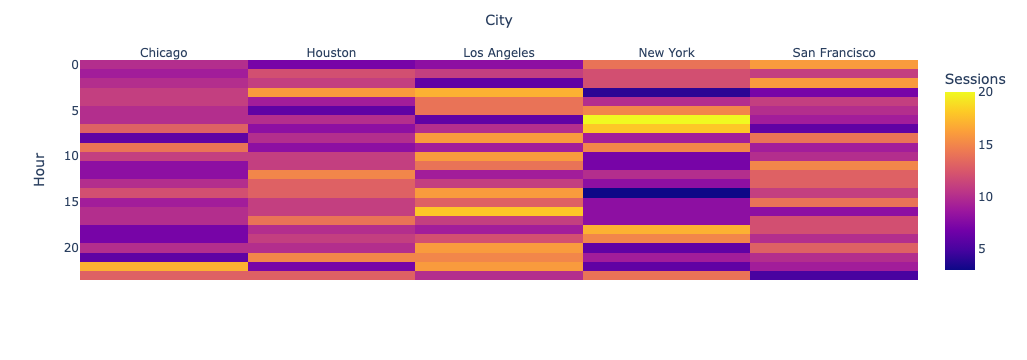

In [14]:
import plotly.express as px

df['Hour'] = df['Charging Start Time'].dt.hour
pivot = df.pivot_table(index='Hour', columns='Charging Station Location', aggfunc='size', fill_value=0)
fig = px.imshow(pivot.values, x=pivot.columns, y=pivot.index, labels=dict(x="City", y="Hour", color="Sessions"))
fig.update_xaxes(side="top"); fig.show()

### 3.2 Charger type dynamics.
### 3.2.1 Charger Type Distribution by City
**Description**  
This graph shows the charger type distribution across all cities in the dataset.

**Explanation**  
Comparing charger type distribution 

<Figure size 1400x800 with 0 Axes>

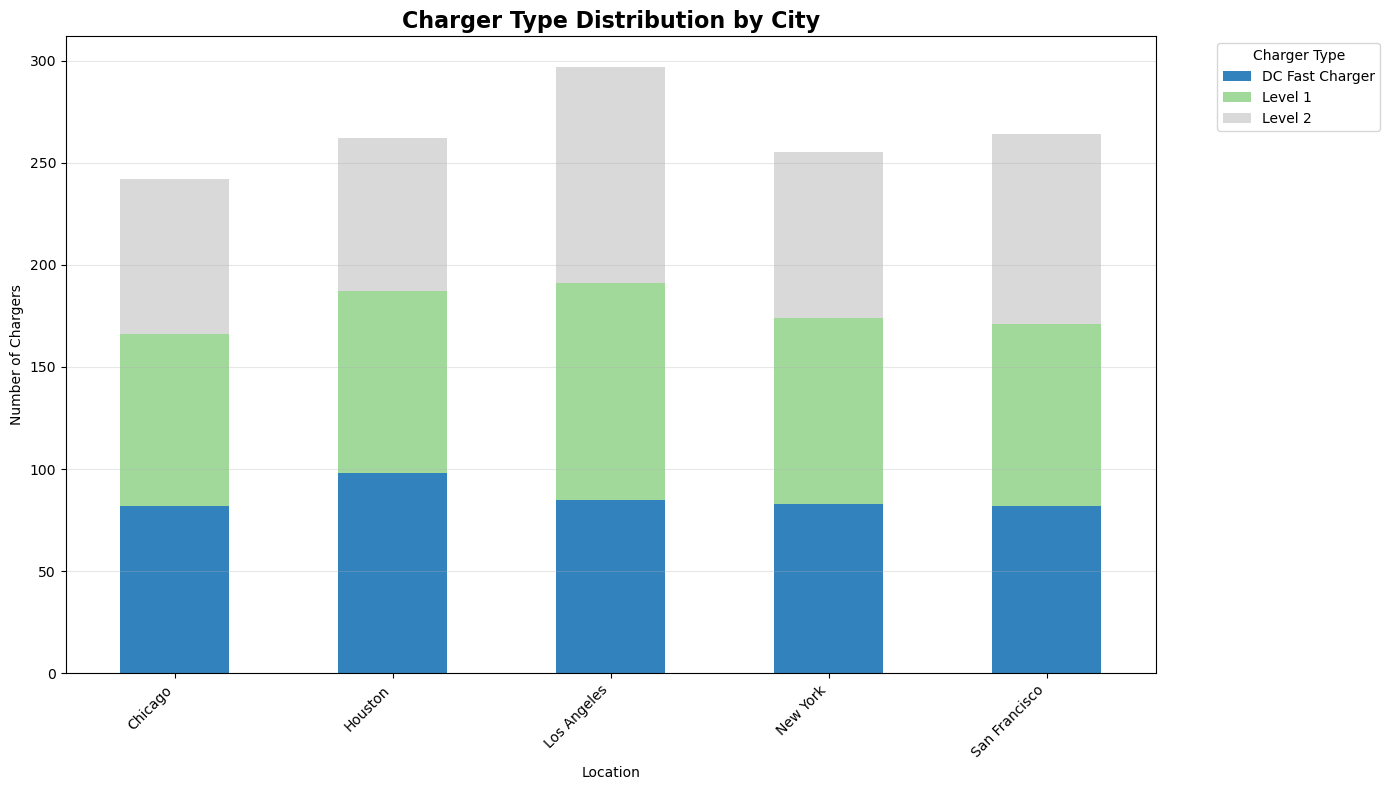

In [59]:
charger_distribution = df.groupby(['Charging Station Location', 'Charger Type']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 8))
charger_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')
plt.title('Charger Type Distribution by City', fontsize=16, fontweight='bold')
plt.xlabel('Location')
plt.ylabel('Number of Chargers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Charger Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

 ### 3.2.2 Average Daily Sessions per Charger Type
**Description**  
This grouped bar chart shows the daily average sessions per charger type across all cities in the dataset.

**Explanation**  
Comparing average charging sessions by charger types reveals the demand patterns.


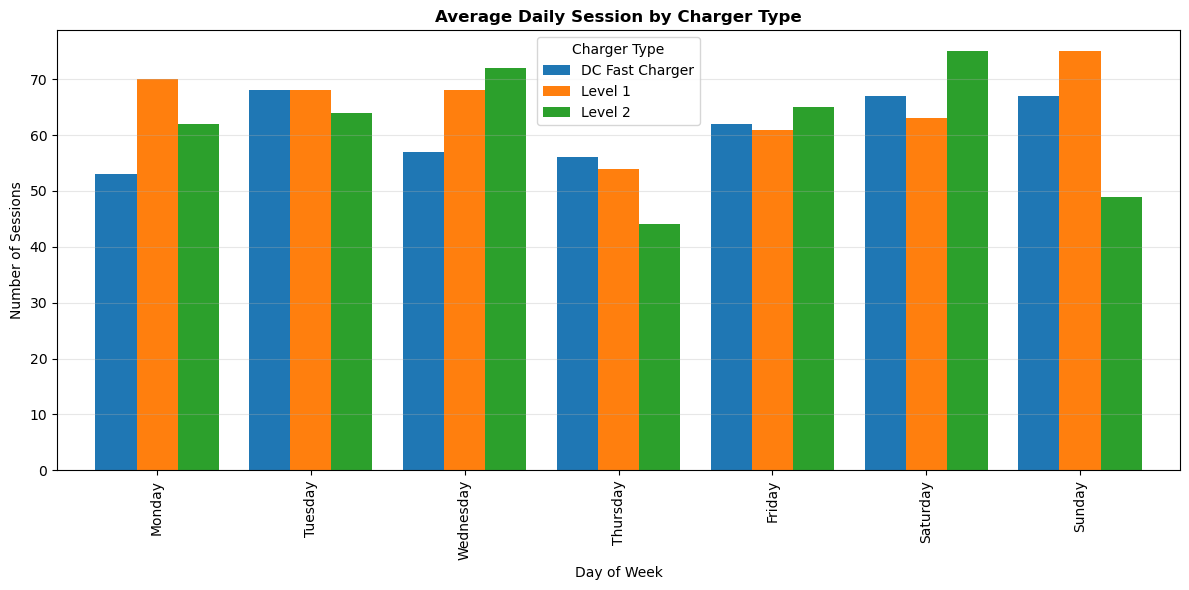

In [16]:
# Simple grouped bar chart
daily_usage = df.groupby(['Day of Week', 'Charger Type'])['Charging Station ID'].count().unstack()

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_usage = daily_usage.reindex(day_order)

# Plot
daily_usage.plot(kind='bar', figsize=(12,6), width=0.8)
plt.title('Average Daily Session by Charger Type', fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sessions')
plt.legend(title='Charger Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2.3 Total Occupancy hours by Charger Type
**Description**  
This grouped bar chart shows the daily total occupancy per charger.

**Explanation**  
Comparing daily total occupancy per charger type focuses on utilisation and revenue potential.

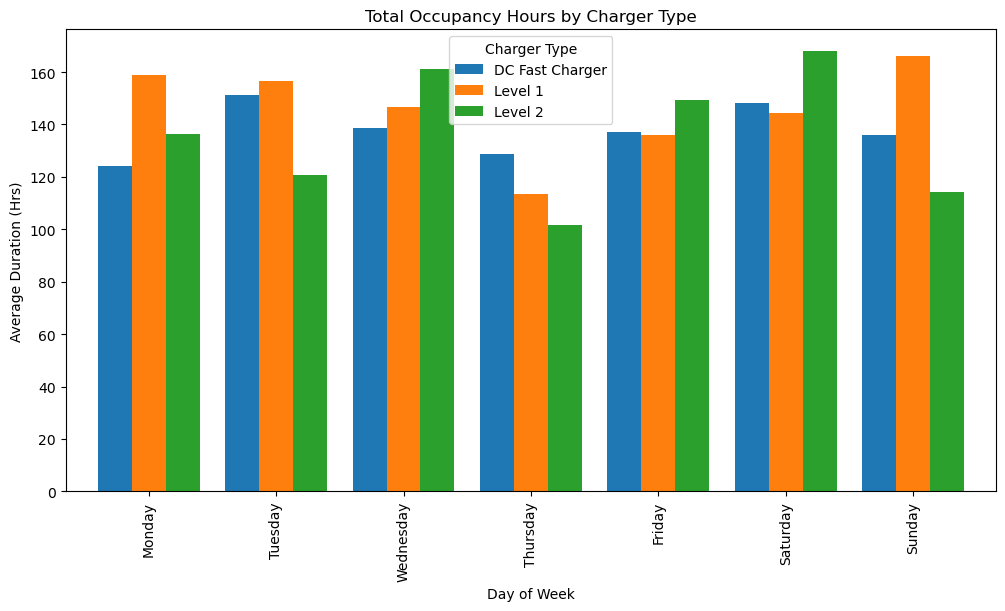

In [17]:
# Total Hours per day by charger type
total_hours = df.groupby(['Day of Week', 'Charger Type'])['Session Duration (hours)'].sum().unstack()

# Plot total hours
total_hours.reindex(day_order).plot(kind='bar', figsize=(12,6), width=0.8)
plt.title('Total Occupancy Hours by Charger Type')
plt.ylabel('Average Duration (Hrs)')
plt.show()

### 3.2.4 Distribution of Charging Duration by Charger Type
**Description**  
This box plot shows the distribution of charging durations across charger types. 

**Explanation**  
Comparing the distribution of charging durations

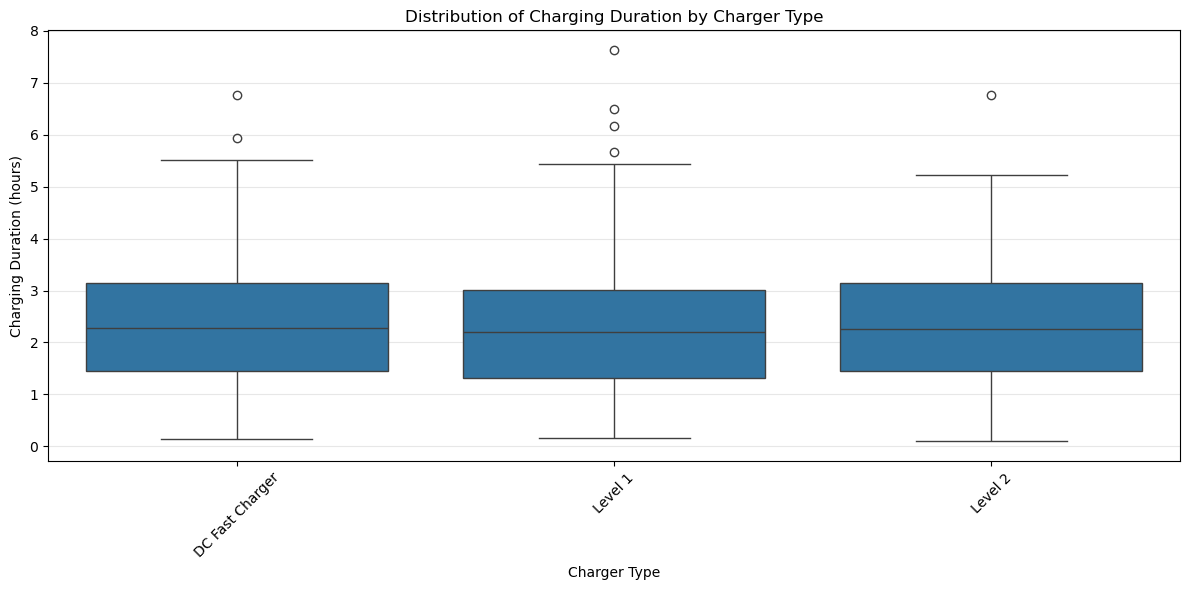

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Charger Type', y='Charging Duration (hours)', data=df_avl)
plt.title('Distribution of Charging Duration by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Charging Duration (hours)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

### 3.3 Temporal (Peak) Analysis.
### 3.3.1 Peak hours by city 
**Description**  
This line graph shows both peak and low hours of charging across the cities in the dataset

**Explanation**  


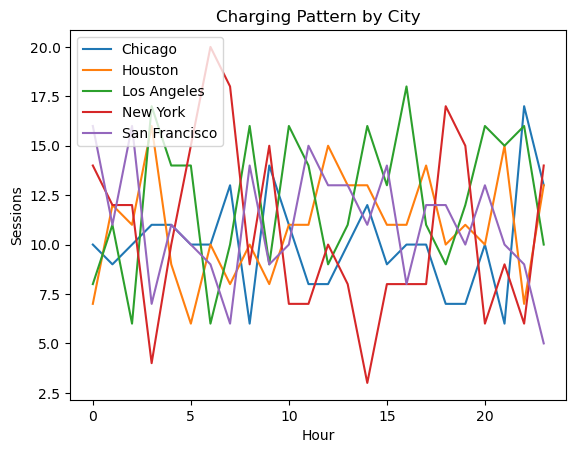

In [9]:
fig, ax = plt.subplots()  # Simple single axes

# Plot data
for city in city_pivot.columns:
    ax.plot(city_pivot.index, city_pivot[city], label=city)

# Basic formatting (like matplotlib examples)
ax.set_xlabel('Hour')
ax.set_ylabel('Sessions')
ax.set_title('Charging Pattern by City')
ax.legend()

plt.show()

### 3.3.2 Peak hours by charger type
**Description**  
This line graph shows 

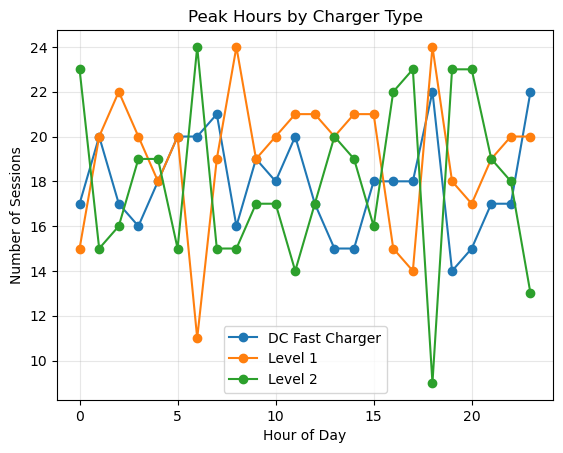

In [20]:
# Peak hours by charger type
fig, ax = plt.subplots()  # Simple single axes

# Plot each charger type
for charger_type in df['Charger Type'].unique():
    charger_data = df[df['Charger Type'] == charger_type]
    charger_hourly = charger_data['Hour'].value_counts().sort_index()
    ax.plot(charger_hourly.index, charger_hourly.values, label=charger_type, marker='o')

# Basic formatting
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Sessions')
ax.set_title('Peak Hours by Charger Type')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

### 3.3.3 Weekday vs weekend Peak patterns
**Description**  
This line graph shows 

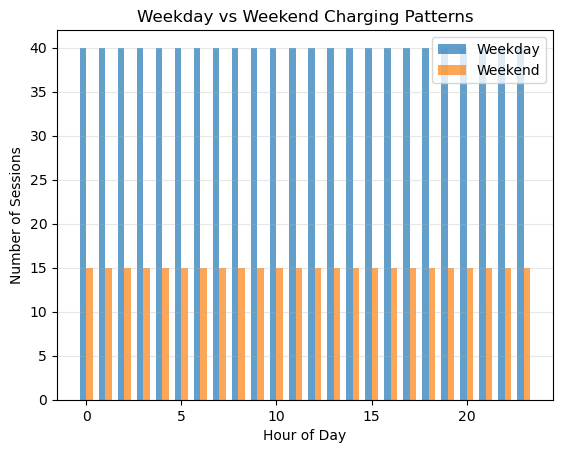

In [21]:
# Weekday vs weekend patterns
fig, ax = plt.subplots()  # Simple single axes

# Create weekday/weekend flag
df['Weekday'] = df['Charging Start Time'].dt.dayofweek < 5  # Monday-Friday = True

# Get counts
weekday_counts = df[df['Weekday']]['Hour'].value_counts().sort_index()
weekend_counts = df[~df['Weekday']]['Hour'].value_counts().sort_index()

# Plot side-by-side bars
width = 0.35
ax.bar(weekday_counts.index - width/2, weekday_counts.values, width, label='Weekday', alpha=0.7)
ax.bar(weekend_counts.index + width/2, weekend_counts.values, width, label='Weekend', alpha=0.7)

# Basic formatting
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Sessions')
ax.set_title('Weekday vs Weekend Charging Patterns')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.show()

### 3.4 Predictive Model 

**Description**  
This section trains a Random Forest classification model to predict EV charging station availability 30 minutes in advance using temporal features (hour of day, day of week), historical utilization patterns (last hour occupancy), and current occupancy status as inputs.

**Explanation**  
The model quantifies how much these factors influence near-future station availability and provides the engine for making short-term availability predictions. This enables real-time user guidance for immediate charging decisions and station management


In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv("clean_ev_data.csv")

### ETL Pipeline

In [ ]:
### Data Preprocessing Pipeline

In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv("clean_ev_data.csv")

# Fix column names for Python (remove spaces)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Parse datetimes - using actual column names
df["Charging_Start_Time"] = pd.to_datetime(df["Charging_Start_Time"])
df["Charging_End_Time"] = pd.to_datetime(df["Charging_End_Time"])

# Create a timestamp column from the start time
df["timestamp"] = df["Charging_Start_Time"]

# Rename station ID to a clean column
df = df.rename(columns={"Charging_Station_ID": "station_id"})

# Build busy label and future availability variable
# Mark each session as busy
df["busy"] = 1

# Expand each session into 15-minute occupancy windows
print("Expanding sessions into 15-minute intervals...")
rows = []

for idx, row in df.iterrows():
    # Create 15-minute intervals for this charging session
    times = pd.date_range(
        start=row["Charging_Start_Time"],
        end=row["Charging_End_Time"],
        freq="15min"
    )
    for t in times:
        rows.append([row["station_id"], t, 1])  # busy=1
    
    # Progress update
    if (idx + 1) % 100 == 0:
        print(f"Processed {idx + 1} sessions...")

ts = pd.DataFrame(rows, columns=["station_id", "timestamp", "busy"])

print(f"Expanded to {len(ts)} 15-minute time slots")

# Remove duplicate timestamps for each station
print("Removing duplicates...")
ts = ts.groupby(['station_id', 'timestamp']).max().reset_index()

# Create a complete date range for all stations
print("Creating complete 15-minute grid...")
all_stations = ts['station_id'].unique()
all_dates = pd.date_range(ts['timestamp'].min(), ts['timestamp'].max(), freq='15min')

# Create MultiIndex with all combinations
full_index = pd.MultiIndex.from_product([all_stations, all_dates], 
                                       names=['station_id', 'timestamp'])

# Reindex to get complete 15-minute grid
ts_complete = (
    ts.set_index(['station_id', 'timestamp'])
      .reindex(full_index, fill_value=0)
      .reset_index()
)

# Sort values
ts = ts_complete.sort_values(["station_id", "timestamp"])

print(f"Final dataset size: {len(ts)} rows")

# shift -2 because each slot is 15 minutes → 2 slots = 30 minutes
print("Creating future availability labels...")
ts["busy_future"] = ts.groupby("station_id")["busy"].shift(-2)

# Convert into ML label (1 = available, 0 = busy)
ts["available_future"] = (ts["busy_future"] == 0).astype(int)

# Create features
print("Creating features...")
ts["hour"] = ts["timestamp"].dt.hour
ts["dayofweek"] = ts["timestamp"].dt.dayofweek
ts["is_weekend"] = ts["dayofweek"].isin([5,6]).astype(int)

# Calculate utilization in last 1 hour (4 * 15min slots)
ts["util_last_1h"] = (
    ts.groupby("station_id")["busy"]
      .rolling(window=4, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

# Drop rows with no future info (last 2 slots for each station)
ts = ts.dropna(subset=["busy_future"])

print(f"Dataset after dropping NAs: {len(ts)} rows")
print(f"Availability rate: {ts['available_future'].mean():.2%}")


# SELECT INPUT FEATURES

features = [
    "hour",
    "dayofweek",
    "is_weekend",
    "util_last_1h",
    "busy"
]

X = ts[features]
y = ts["available_future"]

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True)}")


# Train a baseline Random Forest

print("\nTraining model...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

# Feature importance
print("\nFeature Importances:")
for feature, importance in zip(features, model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

Number of charging sessions: 1320
Number of unique stations: 462
Date range: 2024-01-01 00:00:00 to 2024-02-24 23:00:00
Expanding sessions into 15-minute intervals...
Processed 100 sessions...
Processed 200 sessions...
Processed 300 sessions...
Processed 400 sessions...
Processed 500 sessions...
Processed 600 sessions...
Processed 700 sessions...
Processed 800 sessions...
Processed 900 sessions...
Processed 1000 sessions...
Processed 1100 sessions...
Processed 1200 sessions...
Processed 1300 sessions...
Expanded to 12439 15-minute time slots
Removing duplicates...
Creating complete 15-minute grid...
Final dataset size: 2439360 rows
Creating future availability labels...
Creating features...
Dataset after dropping NAs: 2438436 rows
Availability rate: 99.49%

Feature matrix shape: (2438436, 5)
Target distribution:
available_future
1    0.994909
0    0.005091
Name: proportion, dtype: float64

Training model...

Model Performance:
Accuracy: 0.9978879939633536
F1 Score: 0.998938630152796

F

In [84]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [90]:

# Load Data
df = pd.read_csv("clean_ev_data.csv")

# Fix column names for Python (remove spaces)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Parse datetimes - using actual column names
df["Charging_Start_Time"] = pd.to_datetime(df["Charging_Start_Time"])
df["Charging_End_Time"] = pd.to_datetime(df["Charging_End_Time"])

# Create a timestamp column from the start time
df["timestamp"] = df["Charging_Start_Time"]

# Rename station ID to a clean column
df = df.rename(columns={"Charging_Station_ID": "station_id"})

# Build busy label and future availability variable
# Mark each session as busy
df["busy"] = 1

# Expand each session into 15-minute occupancy windows
print("Expanding sessions into 15-minute intervals...")
rows = []

for idx, row in df.iterrows():
    # Create 15-minute intervals for this charging session
    times = pd.date_range(
        start=row["Charging_Start_Time"],
        end=row["Charging_End_Time"],
        freq="15min"
    )
    for t in times:
        rows.append([row["station_id"], t, 1])  # busy=1
    
    # Progress update
    if (idx + 1) % 100 == 0:
        print(f"Processed {idx + 1} sessions...")

ts = pd.DataFrame(rows, columns=["station_id", "timestamp", "busy"])

print(f"Expanded to {len(ts)} 15-minute time slots")

# Remove duplicate timestamps for each station
print("Removing duplicates...")
ts = ts.groupby(['station_id', 'timestamp']).max().reset_index()

# Create a complete date range for all stations
print("Creating complete 15-minute grid...")
all_stations = ts['station_id'].unique()
all_dates = pd.date_range(ts['timestamp'].min(), ts['timestamp'].max(), freq='15min')

# Create MultiIndex with all combinations
full_index = pd.MultiIndex.from_product([all_stations, all_dates], 
                                       names=['station_id', 'timestamp'])

# Reindex to get complete 15-minute grid
ts_complete = (
    ts.set_index(['station_id', 'timestamp'])
      .reindex(full_index, fill_value=0)
      .reset_index()
)

# Sort values
ts = ts_complete.sort_values(["station_id", "timestamp"])

print(f"Final dataset size: {len(ts)} rows")

# shift -2 because each slot is 15 minutes → 2 slots = 30 minutes
print("Creating future availability labels...")
ts["busy_future"] = ts.groupby("station_id")["busy"].shift(-2)

# Convert into ML label (1 = available, 0 = busy)
ts["available_future"] = (ts["busy_future"] == 0).astype(int)

# Create features
print("Creating features...")
ts["hour"] = ts["timestamp"].dt.hour
ts["dayofweek"] = ts["timestamp"].dt.dayofweek
ts["is_weekend"] = ts["dayofweek"].isin([5,6]).astype(int)

# Calculate utilization in last 1 hour (4 * 15min slots)
ts["util_last_1h"] = (
    ts.groupby("station_id")["busy"]
      .rolling(window=4, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

# Drop rows with no future info (last 2 slots for each station)
ts = ts.dropna(subset=["busy_future"])

print(f"Dataset after dropping NAs: {len(ts)} rows")
print(f"Availability rate: {ts['available_future'].mean():.2%}")


# SELECT INPUT FEATURES

features = [
    "hour",
    "dayofweek",
    "is_weekend",
    "util_last_1h",
    "busy"
]

X = ts[features]
y = ts["available_future"]

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True)}")


Expanding sessions into 15-minute intervals...
Processed 100 sessions...
Processed 200 sessions...
Processed 300 sessions...
Processed 400 sessions...
Processed 500 sessions...
Processed 600 sessions...
Processed 700 sessions...
Processed 800 sessions...
Processed 900 sessions...
Processed 1000 sessions...
Processed 1100 sessions...
Processed 1200 sessions...
Processed 1300 sessions...
Expanded to 12439 15-minute time slots
Removing duplicates...
Creating complete 15-minute grid...
Final dataset size: 2439360 rows
Creating future availability labels...
Creating features...
Dataset after dropping NAs: 2438436 rows
Availability rate: 99.49%

Feature matrix shape: (2438436, 5)
Target distribution:
available_future
1    0.994909
0    0.005091
Name: proportion, dtype: float64


In [91]:
# Train a baseline Random Forest

print("\nTraining model...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))


Training model...

Model Performance:
Accuracy: 0.9978879939633536
F1 Score: 0.998938630152796


In [93]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train_sc, y_train)

log_pred = log_reg.predict(X_test_sc)
log_proba = log_reg.predict_proba(X_test_sc)[:,1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))
print("ROC AUC:", roc_auc_score(y_test, log_proba))
print("\nClassification Report:\n", classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.9978879939633536
F1 Score: 0.998938630152796
ROC AUC: 0.8944211676176269

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      2483
           1       1.00      1.00      1.00    485205

    accuracy                           1.00    487688
   macro avg       0.90      0.89      0.90    487688
weighted avg       1.00      1.00      1.00    487688

